# Traveling Salesperson Problem

In [2]:
import matplotlib.pyplot as plt
import numpy as np


def randomize_cities(num_nodes: int):
    positions = np.random.rand(num_nodes, 2)

    fig, ax = plt.subplots()
    ax.scatter(positions[:, 0], positions[:, 1], color='blue')

    for i, (x, y) in enumerate(positions):
        ax.text(x, y, f'N{i}', fontsize=12, ha='right')

    plt.title("Randomized cities")
    plt.grid(True)
    plt.show()

    # pairwise distance using Euclidean distance
    dist = np.zeros((num_nodes, num_nodes))
    for i in range(num_nodes):
        for j in range(num_nodes):
            dist[i, j] = np.linalg.norm(positions[i] - positions[j])
    return dist


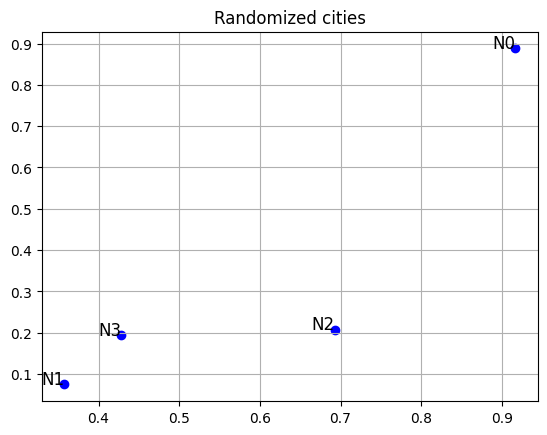

In [3]:
weights = randomize_cities(4)

For $N$ cities, use $N^2$ binary variables x(i,p), where i represents the index of a city and p represents the order of the city in the route. In other words, if city i is visited at step p of the route, then x(i,p) = 1.

Constraints\
This euations ensure that each city is visited only once, and each step of the route is in one city.
$
\begin{gather}
\sum_{p=0}^{N-1} ( 1 - \sum_{i=0}^{N-1} x(i, p) )^2 = 0 \\
\sum_{i=0}^{N-1} ( 1 - \sum_{p=0}^{N-1} x(i, p) )^2 = 0 \\ 
\sum_{i=0}^{N-1} x_{i, p} = 1,\ for\ all\ p \\
\sum_{p=0}^{N-1} x_{i, p} = 1,\ for\ all\ i \\
\end{gather}
$

Objective\
Find the shortest Hamiltonian cycle in a graph
$
\begin{gather}
C(x) = \sum_{i, j} w_{i, j} \sum_{p=0}^{N-1} x_{i, p}x_{j, p + 1}  \\
\end{gather}
$

In [4]:
weights

array([[0.        , 0.98684367, 0.71663334, 0.84878287],
       [0.98684367, 0.        , 0.36044142, 0.13844602],
       [0.71663334, 0.36044142, 0.        , 0.26520398],
       [0.84878287, 0.13844602, 0.26520398, 0.        ]])

In [5]:
int_dists = (weights * 100).astype(int)
int_dists

array([[ 0, 98, 71, 84],
       [98,  0, 36, 13],
       [71, 36,  0, 26],
       [84, 13, 26,  0]])

In [6]:
from qiskit_optimization import QuadraticProgram



qp = QuadraticProgram()

size = int_dists.shape[0]

cities = {} # dictionary to store the city and order
for i in range(size):
    for p in range(size):
        cities[f'x_{i}_{p}'] = qp.binary_var(f'x_{i}_{p}')
        




# Objective function
quadratic_matrix = {}
for i in range(size):
    for j in range(size):
        if i != j:
            for p in range(size):
                quadratic_matrix[(f'x_{i}_{p}', f'x_{j}_{(p+1)%size}')] = int_dists[i, j] 

qp.minimize(quadratic=quadratic_matrix)
                
# Constraint 1: each city is visited exactly once
for i in range(size):
    qp.linear_constraint(linear={f'x_{i}_{p}': 1 for p in range(size)}, sense='==', rhs=1)

# Constraint 2: each city is left exactly once
for p in range(size):
    qp.linear_constraint(linear={f'x_{i}_{p}': 1 for i in range(size)}, sense='==', rhs=1)

print(qp.prettyprint())



Problem name: 

Minimize
  98*x_0_0*x_1_1 + 98*x_0_0*x_1_3 + 71*x_0_0*x_2_1 + 71*x_0_0*x_2_3
  + 84*x_0_0*x_3_1 + 84*x_0_0*x_3_3 + 98*x_0_1*x_1_0 + 98*x_0_1*x_1_2
  + 71*x_0_1*x_2_0 + 71*x_0_1*x_2_2 + 84*x_0_1*x_3_0 + 84*x_0_1*x_3_2
  + 98*x_0_2*x_1_1 + 98*x_0_2*x_1_3 + 71*x_0_2*x_2_1 + 71*x_0_2*x_2_3
  + 84*x_0_2*x_3_1 + 84*x_0_2*x_3_3 + 98*x_0_3*x_1_0 + 98*x_0_3*x_1_2
  + 71*x_0_3*x_2_0 + 71*x_0_3*x_2_2 + 84*x_0_3*x_3_0 + 84*x_0_3*x_3_2
  + 36*x_1_0*x_2_1 + 36*x_1_0*x_2_3 + 13*x_1_0*x_3_1 + 13*x_1_0*x_3_3
  + 36*x_1_1*x_2_0 + 36*x_1_1*x_2_2 + 13*x_1_1*x_3_0 + 13*x_1_1*x_3_2
  + 36*x_1_2*x_2_1 + 36*x_1_2*x_2_3 + 13*x_1_2*x_3_1 + 13*x_1_2*x_3_3
  + 36*x_1_3*x_2_0 + 36*x_1_3*x_2_2 + 13*x_1_3*x_3_0 + 13*x_1_3*x_3_2
  + 26*x_2_0*x_3_1 + 26*x_2_0*x_3_3 + 26*x_2_1*x_3_0 + 26*x_2_1*x_3_2
  + 26*x_2_2*x_3_1 + 26*x_2_2*x_3_3 + 26*x_2_3*x_3_0 + 26*x_2_3*x_3_2

Subject to
  Linear constraints (8)
    x_0_0 + x_0_1 + x_0_2 + x_0_3 == 1  'c0'
    x_1_0 + x_1_1 + x_1_2 + x_1_3 == 1  'c1'
    x_2_0 

In [7]:
from qiskit_optimization.converters import QuadraticProgramToQubo

qp2qubo = QuadraticProgramToQubo()
qubo = qp2qubo.convert(qp)
qubitOp, offset = qubo.to_ising()

print('Offset:', offset)
print('Ising Hamiltonian:')
print(str(qubitOp))


Offset: 42656.0
Ising Hamiltonian:
SparsePauliOp(['IIIIIIIIIIIIIIIZ', 'IIIIIIIIIIIIIIZI', 'IIIIIIIIIIIIIZII', 'IIIIIIIIIIIIZIII', 'IIIIIIIIIIIZIIII', 'IIIIIIIIIIZIIIII', 'IIIIIIIIIZIIIIII', 'IIIIIIIIZIIIIIII', 'IIIIIIIZIIIIIIII', 'IIIIIIZIIIIIIIII', 'IIIIIZIIIIIIIIII', 'IIIIZIIIIIIIIIII', 'IIIZIIIIIIIIIIII', 'IIZIIIIIIIIIIIII', 'IZIIIIIIIIIIIIII', 'ZIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIZZ', 'IIIIIIIIIIIIIZIZ', 'IIIIIIIIIIIIZIIZ', 'IIIIIIIIIIIZIIIZ', 'IIIIIIIIIIZIIIIZ', 'IIIIIIIIZIIIIIIZ', 'IIIIIIIZIIIIIIIZ', 'IIIIIIZIIIIIIIIZ', 'IIIIZIIIIIIIIIIZ', 'IIIZIIIIIIIIIIIZ', 'IIZIIIIIIIIIIIIZ', 'ZIIIIIIIIIIIIIIZ', 'IIIIIIIIIIIIIZZI', 'IIIIIIIIIIIIZIZI', 'IIIIIIIIIIIZIIZI', 'IIIIIIIIIIZIIIZI', 'IIIIIIIIIZIIIIZI', 'IIIIIIIZIIIIIIZI', 'IIIIIIZIIIIIIIZI', 'IIIIIZIIIIIIIIZI', 'IIIZIIIIIIIIIIZI', 'IIZIIIIIIIIIIIZI', 'IZIIIIIIIIIIIIZI', 'IIIIIIIIIIIIZZII', 'IIIIIIIIIIZIIZII', 'IIIIIIIIIZIIIZII', 'IIIIIIIIZIIIIZII', 'IIIIIIZIIIIIIZII', 'IIIIIZIIIIIIIZII', 'IIIIZIIIIIIIIZII', 'IIZIIIIIIIIIIZII', 'IZIIIIIII

In [8]:
from qiskit_optimization.algorithms import MinimumEigenOptimizer
from qiskit_algorithms import NumPyMinimumEigensolver

exact = MinimumEigenOptimizer(NumPyMinimumEigensolver())
result = exact.solve(qp)
print(result.prettyprint())

def reorder(x, size):
    y = np.zeros(size)
    for i, v in enumerate(x):
        if v == 1:
            y[int(i) % size] = i // size
    return y

print(reorder(result.samples[0].x, size))
   

objective function value: 204.0
variable values: x_0_0=0.0, x_0_1=0.0, x_0_2=0.0, x_0_3=1.0, x_1_0=0.0, x_1_1=1.0, x_1_2=0.0, x_1_3=0.0, x_2_0=0.0, x_2_1=0.0, x_2_2=1.0, x_2_3=0.0, x_3_0=1.0, x_3_1=0.0, x_3_2=0.0, x_3_3=0.0
status: SUCCESS
[3. 1. 2. 0.]
